<a href="https://colab.research.google.com/github/parth1614/Machine_Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as skPCA
import seaborn

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
df1 = pd.DataFrame(data = digits.data)

In [6]:
df1['species'] = digits.target
X = digits.data
Y = digits.target

In [7]:
##Normalizization using Z score
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.

In [9]:
##Computing Co-variance Matrix
features = X_scaled.T
cov_mat = np.cov(features)
print(cov_mat)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


In [20]:
##Calculating EigenValues and EigenVectors
values, vectors = np.linalg.eig(cov_mat)
values[:5]
vectors[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [18]:
##Choosing top K eigenValues
explained_variances = []
for i in range (len(values)):
  explained_variances.append(values[i]/np.sum(values))
print(explained_variances)  

[0.12033916097734898, 0.09561054403097898, 0.0844441489262453, 0.06498407907524166, 0.04860154875966399, 0.042141198692719505, 0.03942082803567379, 0.03389380924638318, 0.029982210116252198, 0.029320025512522215, 0.027818054635503346, 0.02577055092582008, 0.022753033157642558, 0.022271797395143473, 0.021652294318492367, 0.019141666064421355, 0.017755470851681925, 0.016380692742844254, 0.015964601688623382, 0.014891911870878252, 0.013479695658179391, 0.0127193137023476, 0.011658373505919513, 0.010576465985363173, 0.009753159471981082, 0.009445589897319969, 0.00863013826970722, 0.008366428536685157, 0.007976932484112407, 0.007464713709260606, 0.0072558215137027435, 0.0069191124548118104, 0.0065390853557261526, 0.006407925738459876, 0.00591384111722343, 0.005711624052235237, 0.005236368034166366, 0.004818075864451421, 0.0008253509448180407, 0.004537192598584493, 0.001036957301557179, 0.0042316275323278085, 0.004060530699790378, 0.00397084808275827, 0.0012510074249730148, 0.001351184113370

In [22]:
##Constructing the reduced dataset

projected1 = X_scaled.dot(vectors.T[0])
projected2 = X_scaled.dot(vectors.T[1])

res = pd.DataFrame(projected1,columns=['PC1'])
res['PC2'] = projected2
res['Y'] = Y
res.head()

,PC1,PC2,Y
0,-1.914214,0.954502,0
1,-0.588980,-0.924636,1
2,-1.302039,0.317189,2
3,3.020770,0.868772,3
4,-4.528949,1.093480,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


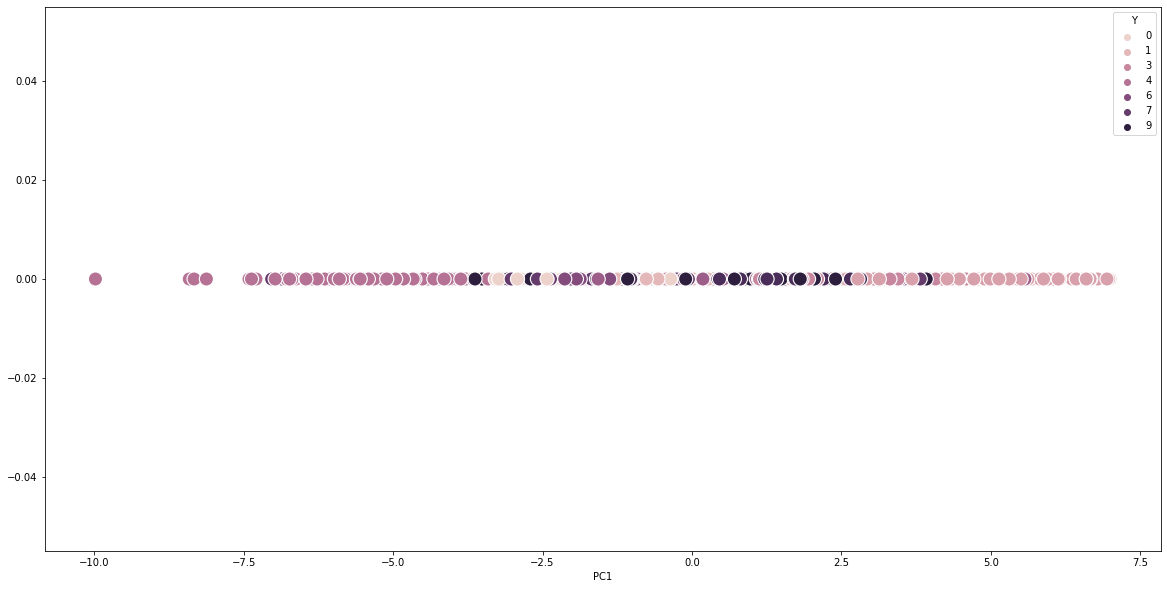

In [25]:
##Visualize in 1-D

plt.figure(figsize=(20, 10))
seaborn.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


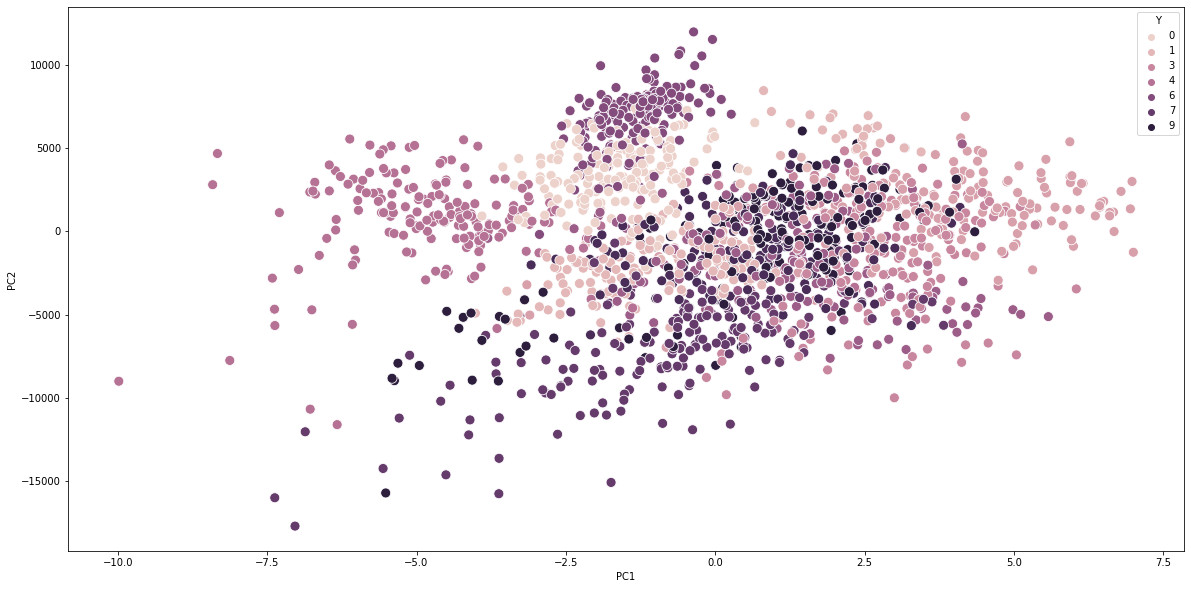

In [30]:
##Visualizing in 2D

plt.figure(figsize=(20, 10))
seaborn.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['Y'], s=100)